In [100]:
%pip install shapely

You should consider upgrading via the '/Users/rvlist/.pyenv/versions/adventofcode/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [101]:
from aocd import get_data, submit
import re
import numpy as np

data = """Sensor at x=2, y=18: closest beacon is at x=-2, y=15
Sensor at x=9, y=16: closest beacon is at x=10, y=16
Sensor at x=13, y=2: closest beacon is at x=15, y=3
Sensor at x=12, y=14: closest beacon is at x=10, y=16
Sensor at x=10, y=20: closest beacon is at x=10, y=16
Sensor at x=14, y=17: closest beacon is at x=10, y=16
Sensor at x=8, y=7: closest beacon is at x=2, y=10
Sensor at x=2, y=0: closest beacon is at x=2, y=10
Sensor at x=0, y=11: closest beacon is at x=2, y=10
Sensor at x=20, y=14: closest beacon is at x=25, y=17
Sensor at x=17, y=20: closest beacon is at x=21, y=22
Sensor at x=16, y=7: closest beacon is at x=15, y=3
Sensor at x=14, y=3: closest beacon is at x=15, y=3
Sensor at x=20, y=1: closest beacon is at x=15, y=3"""
data = get_data(year=2022, day=15)

dist = lambda p1, p2: int(np.linalg.norm(p1-p2, 1))

data = data.splitlines()
data = [re.findall(r"=([-\d]*)", line) for line in data]
data = [list(map(int, d)) for d in data]
data = [[np.array([d[0], d[1]]), np.array([d[2], d[3]])] for d in data]
data = [(p, b, dist(p, b)) for p,b in data]
data

[(array([3797530, 3451192]), array([3316341, 3328308]), 604073),
 (array([3779164,   33938]), array([4608350,  708806]), 1504054),
 (array([1331810, 3260896]), array([2075597, 3280016]), 762907),
 (array([393374, 696899]), array([2021690,  453306]), 1871909),
 (array([2928048,  923094]), array([2021690,  453306]), 1376146),
 (array([2386726, 3645023]), array([2075597, 3280016]), 676136),
 (array([1900159, 2381031]), array([1649961, 2000000]), 631229),
 (array([2601378, 2979844]), array([2218962, 2701963]), 660297),
 (array([2254818,   32199]), array([2021690,  453306]), 654235),
 (array([2689643,  375840]), array([2021690,  453306]), 745419),
 (array([ 909141, 2842547]), array([2218962, 2701963]), 1450405),
 (array([3915731, 2454320]), array([4268501, 1853073]), 954017),
 (array([1693574, 1344104]), array([1649961, 2000000]), 699509),
 (array([1760260, 3297662]), array([2075597, 3280016]), 332983),
 (array([1909567, 3990737]), array([2075597, 3280016]), 876751),
 (array([2097863, 31797

In [102]:
def merge_ranges(left, right):
    if left.stop >= right.start:
        new_min = min(left.start, left.start)
        new_max = max(left.stop, right.stop)
        return [range(new_min, new_max)]
    return [left, right]
    
    
merge_ranges(range(-4, 0), range(1, 103))

[range(-4, 0), range(1, 103)]

In [103]:
x = [range(5), range(10, 12), range(-4, 10), range(13, 15), range(-10, -7)]
def overlap_ranges(ranges):
    ranges.sort(key=lambda r: min(r))
    output = []
    l = ranges[0]
    for r in ranges[1:]:
        res = merge_ranges(l, r)
        if len(res) == 2:
            l = res[1]
            output.append(res[0])
        else: 
            l = res[0]
    output.append(l)
    return output

overlap_ranges(x)

[range(-10, -7), range(-4, 12), range(13, 15)]

In [104]:
y = 2000000
def gen_range(p, d, y):
    y_offset = y - p[1]
    n_x = d-abs(y_offset)
    return range(-n_x + p[0], n_x + 1 + p[0])
    
def ranges_for_row(y):
    ranges = [gen_range(p, d, y) for p, _, d in data if abs(y - p[1]) <= d]
    coverage = overlap_ranges(ranges)
    return coverage

In [105]:
ranges_for_row(2000000)
answer = coverage.stop - coverage.start - 1
answer

5511201

## Runs in 286 ms which is quite nice, but no way that that will work for 4 million rows 

In [106]:
%timeit ranges_for_row(2000000)

286 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## We'll treat the range of each sensor as a diamond shaped area, intersect all areas and find the interior of that shape. Only space for the distress beacon to hide 

In [111]:
import shapely
from shapely.geometry import Polygon
from shapely.ops import unary_union

def make_polygon(d):
    p, _, radius = d
    points = p + np.array([[0,radius], [radius,0], [0,-radius], [-radius,0]])
    points = [tuple(p) for p in points]
    return Polygon(points)

polygons = [make_polygon(d) for d in data]
all_coverages = unary_union(polygons)

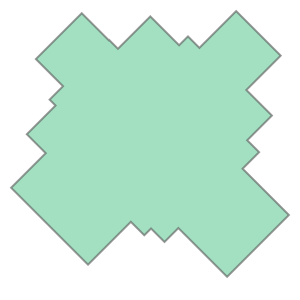

In [112]:
all_coverages

In [118]:
p.interiors[0].coords.xy

(array('d', [2829680.0, 2829681.0, 2829680.0, 2829679.0, 2829680.0]),
 array('d', [3411839.0, 3411840.0, 3411841.0, 3411840.0, 3411839.0]))

In [99]:
answer = 2829680*4000000 + 3411840
answer

11318723411840